# Final Project
## Thi Trinh - 20461296

This is used to describe the test and how data is used to train machine to udnerstand sign language

### Task 1. Loading the data

In [3]:
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import numba

In [4]:
data_train = pd.read_csv('sign_mnist_train.csv')
data_test = pd.read_csv('sign_mnist_test.csv')

In [5]:
print(data_train.shape)
data_train

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
print(data_test.shape)
data_test

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


Putting labels into X and y training variables

In [7]:
y_train = data_train['label'].to_numpy()
X_train = data_train.drop(columns = ['label'], axis =1 )

Putting labels into X and y testing variables

In [8]:
y_test = data_test['label'].to_numpy()
X_test = data_test.drop(columns = ['label'],axis = 1)

Visualizing number of digits classes 

Text(0.5, 1.0, 'Distribution classes')

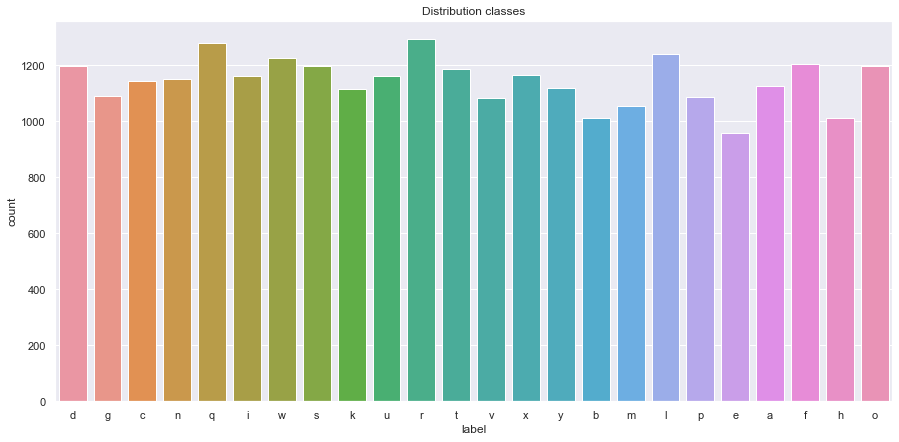

In [7]:
plt.figure(figsize = (15,7))
alpha_dict = {idx:letter for idx, letter in enumerate(string.ascii_lowercase)}
alpha_labels = data_train.label.apply(lambda x: alpha_dict[x])
sns.countplot(x=alpha_labels)
plt.title('Distribution classes')

Plotting out some samples to help visualing it easier

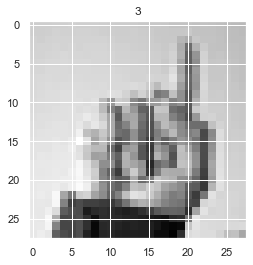

In [8]:
img = X_train.iloc[9].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(data_train.iloc[9,0])
plt.show()

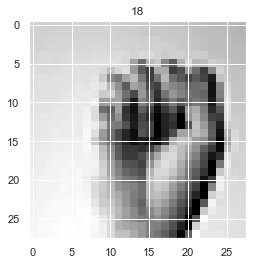

In [9]:
img = X_train.iloc[20].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(data_train.iloc[20,0])
plt.show()

### Task 2. Logistic Regression

In [20]:

class myLogisticRegression():
    """ Logistic Regression classifier -- this also works for the multiclass case.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    """
    
    def __init__(self, learning_rate=.1, opt_method = 'SGD', num_epochs = 50, size_batch = 20):
        
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate
        self.opt_method = opt_method
        self.num_epochs = num_epochs
        self.size_batch = size_batch
        

    def fit(self, data, y, n_iterations = 1000):
        """ 
        Determine the optimal parameter W for the input data x,y 
        """
        self.K = max(y)+1 
        ones = np.ones((data.shape[0],1))  
        X = np.concatenate((ones, data), axis = 1)
        eta = self.learning_rate
        
        W  = np.zeros((np.shape(X)[1],max(y)+1)) 
        if self.opt_method == 'GD':
            for k in range(n_iterations):
                dW = self.loss_gradient(W,X,y) 
                W = W - eta * dW 
                # this step is for inspection purposes
                if k % 500 == 0: 
                    print("loss after", k+1, "iterations is: ", self.loss(W,X,y))
        
        if self.opt_method == 'SGD':
            N = X.shape[0]
            num_epochs = self.num_epochs
            size_batch = self.size_batch
            num_iter = 0
            for e in range(num_epochs):
                shuffle_index = np.random.permutation(N) # in each epoch, we first reshuffle the data to create "randomness"
                for m in range(0,N,size_batch):   # m is the starting index of mini-batch
                    i = shuffle_index[m:m+size_batch] # index of samples in the mini-batch
                    dW = self.loss_gradient(W,X[i,:],y[i]) # only use the data in mini-batch to compute gradient. Note the average is taken in the loss_gradient function
                    W = W - eta * dW 
                
                    if e % 1 == 0 and num_iter % 50 ==0: # print loss during the training process
                        print("loss after", e+1, "epochs and ", num_iter+1, "iterations is: ", self.loss(W,X,y))
        
                    num_iter = num_iter +1  # number of total iterations
            
        self.coeff = W
        
    def predict(self, data):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        W = self.coeff # the estimated W
        y_pred = np.argmax(self.sigma(X,W), axis =1) # the category with largest probability
        return y_pred
    
    def score(self, data, y_true):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigma(self,X,W): #return the softmax probability
        s = np.exp(np.matmul(X,W))
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total
    
    def loss(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value+1e-10)[:,k] * (y == k) # avoid nan issues
        return -np.mean(loss_vector)
                          
    def loss_gradient(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        dLdW = np.zeros((X.shape[1],K))
        for k in range(K):
            dLdWk =(f_value[:,k] - (y==k)).reshape(-1,1)*X # Numpy broadcasting
            dLdW[:,k] = np.mean(dLdWk, axis=0)   # RHS is 1D Numpy array -- so you can safely put it in the k-th column of 2D array dLdW
        return dLdW

In [23]:
lg_sgd = myLogisticRegression(learning_rate=1e-6, opt_method = 'SGD', num_epochs = 15, size_batch = 40)

In [24]:
%%time
lg_sgd.fit(X_train,y_train)

loss after 1 epochs and  1 iterations is:  3.351420176100326
loss after 1 epochs and  51 iterations is:  3.22897810402572
loss after 1 epochs and  101 iterations is:  2.6977993957555393
loss after 1 epochs and  151 iterations is:  2.568944993710163
loss after 1 epochs and  201 iterations is:  2.5042792733476955
loss after 1 epochs and  251 iterations is:  2.2400701395272056
loss after 1 epochs and  301 iterations is:  2.0962251118414787
loss after 1 epochs and  351 iterations is:  2.0441227408305154
loss after 1 epochs and  401 iterations is:  1.8906381013683509
loss after 1 epochs and  451 iterations is:  1.8121963249290856
loss after 1 epochs and  501 iterations is:  1.8991833194912189
loss after 1 epochs and  551 iterations is:  2.043413250613708
loss after 1 epochs and  601 iterations is:  1.6727456925748696
loss after 1 epochs and  651 iterations is:  1.8033345063288528
loss after 2 epochs and  701 iterations is:  1.641851005162719
loss after 2 epochs and  751 iterations is:  1.52

loss after 10 epochs and  6351 iterations is:  0.6206495243606159
loss after 10 epochs and  6401 iterations is:  0.5975710987293602
loss after 10 epochs and  6451 iterations is:  0.6053300104685237
loss after 10 epochs and  6501 iterations is:  0.6017640372189559
loss after 10 epochs and  6551 iterations is:  0.589004423287741
loss after 10 epochs and  6601 iterations is:  0.5886600589880263
loss after 10 epochs and  6651 iterations is:  0.5770145349237877
loss after 10 epochs and  6701 iterations is:  0.5885214748794235
loss after 10 epochs and  6751 iterations is:  0.57874225810034
loss after 10 epochs and  6801 iterations is:  0.6022586350284206
loss after 10 epochs and  6851 iterations is:  0.5825810118052068
loss after 11 epochs and  6901 iterations is:  0.5799663260527679
loss after 11 epochs and  6951 iterations is:  0.5960037133496748
loss after 11 epochs and  7001 iterations is:  0.5539084898865484
loss after 11 epochs and  7051 iterations is:  0.6175528076027449
loss after 11

In [13]:
lg_sgd.score(X_test,y_test)

0.6939486893474623

Description on using SGD instead of GD to boost the process of fitting data + evaluation on the score 

### Task 3: Principle Component Analysis

In [17]:
class myPCA():
    '"PCA dimensional reduction method"'
    
    def __init__(self, n_components = 2):
        
        self.n_c = n_components
    
    
    def fit(self,X):
        
        '"Multiple variables are explained into principle components"'
        cov_mat = np.cov(X.T) # covariance matrix, the input matrix to this function does not need to be centered
        eig_val, eig_vec = np.linalg.eigh(cov_mat) #eigen-values and orthogonal eigen-vectors --ascending order
        eig_val = np.flip(eig_val) # reverse the order --descending
        eig_vec = np.flip(eig_vec,axis=1) # reverse the order
        self.eig_values = eig_val[:self.n_c] # select the top eigen-vals
        self.principle_components = eig_vec[:,:self.n_c] # select the top eigen-vecs
        self.variance_ratio = self.eig_values/eig_val.sum() # variance explained by each PC
    
    def transform(self,X):
        '"project centered data onto principle components"'
        return np.matmul(X-X.mean(axis = 0),self.principle_components) #project the data (centered) on PCs

In [18]:
pca = myPCA(n_components = 15)
pca.fit(X_test)
X_test_pca = pca.transform(X_test)

In [19]:
X_test_pca.shape

(7172, 15)

In [53]:
X_test_new = X_test_pca.to_numpy()

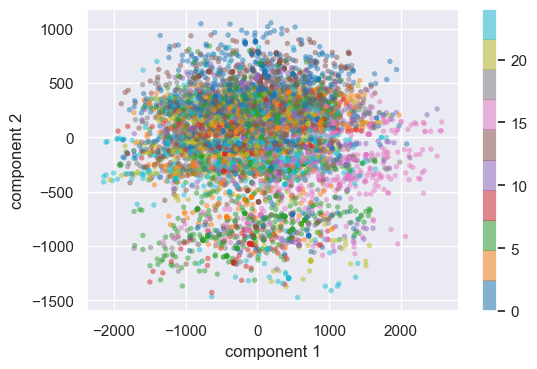

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_test_new[:, 0], X_test_new[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Evaluate result

### Task 4: Try other methods using Scikit-Learn

1. Train dataset with kNN 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 20)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test,y_test)

0.7731455660903513

2. Train dataset with Decision Tree

In [7]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.42136084774121585

3. Train dataset with Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, max_samples = 0.5, max_depth=5, random_state=0, n_jobs = -1) # make 1000 decision trees by random picking up 90% of the dataset, and each tree has the maximum depth of 5. njobs = -1 means you ask to use all the processors of your computer
rf_clf.fit(X_train, y_train) 
rf_clf.score(X_test, y_test)

0.4795036252091467

4. Train dataset with Multidimensional scaling (MDS)

In [11]:
from sklearn.manifold import MDS
mds = MDS(n_jobs = -1) 
X_mds = mds.fit_transform(X_test)

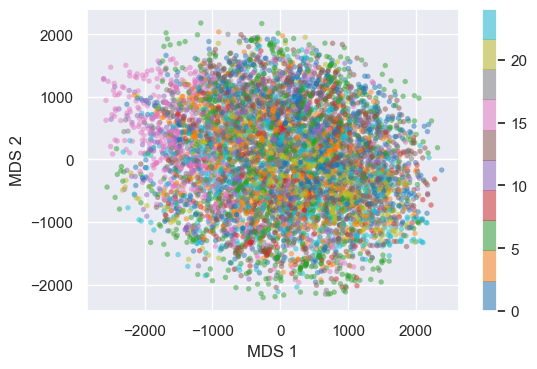

In [12]:
figure = plt.figure(dpi=100)
plt.scatter(X_mds[:, 0], X_mds[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.colorbar();

Description on using 3 supervised and 1 unsupervived model, and how kNN performs best

### Task 5: Try other python package in Machine Learning

### Task 7

In [32]:
from numba import jit
class myLogisticRegression():
    """ Logistic Regression classifier -- this also works for the multiclass case.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    """
    
    def __init__(self, learning_rate=.1, opt_method = 'SGD', num_epochs = 50, size_batch = 20):
        
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate
        self.opt_method = opt_method
        self.num_epochs = num_epochs
        self.size_batch = size_batch
        

    @jit
    def fit(self, data, y, n_iterations = 1000):
        """ 
        Determine the optimal parameter W for the input data x,y 
        """
        self.K = max(y)+1 
        ones = np.ones((data.shape[0],1))  
        X = np.concatenate((ones, data), axis = 1)
        eta = self.learning_rate
        
        W  = np.zeros((np.shape(X)[1],max(y)+1)) 
        if self.opt_method == 'GD':
            for k in range(n_iterations):
                dW = self.loss_gradient(W,X,y) 
                W = W - eta * dW 
                # this step is for inspection purposes
                if k % 500 == 0: 
                    print("loss after", k+1, "iterations is: ", self.loss(W,X,y))
        
        if self.opt_method == 'SGD':
            N = X.shape[0]
            num_epochs = self.num_epochs
            size_batch = self.size_batch
            num_iter = 0
            for e in range(num_epochs):
                shuffle_index = np.random.permutation(N) # in each epoch, we first reshuffle the data to create "randomness"
                for m in range(0,N,size_batch):   # m is the starting index of mini-batch
                    i = shuffle_index[m:m+size_batch] # index of samples in the mini-batch
                    dW = self.loss_gradient(W,X[i,:],y[i]) # only use the data in mini-batch to compute gradient. Note the average is taken in the loss_gradient function
                    W = W - eta * dW 
                
                    if e % 1 == 0 and num_iter % 50 ==0: # print loss during the training process
                        print("loss after", e+1, "epochs and ", num_iter+1, "iterations is: ", self.loss(W,X,y))
        
                    num_iter = num_iter +1  # number of total iterations
            
        self.coeff = W
        
    def predict(self, data):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        W = self.coeff # the estimated W
        y_pred = np.argmax(self.sigma(X,W), axis =1) # the category with largest probability
        return y_pred
    
    def score(self, data, y_true):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigma(self,X,W): #return the softmax probability
        s = np.exp(np.matmul(X,W))
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total
    
    def loss(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value+1e-10)[:,k] * (y == k) # avoid nan issues
        return -np.mean(loss_vector)
                          
    def loss_gradient(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        dLdW = np.zeros((X.shape[1],K))
        for k in range(K):
            dLdWk =(f_value[:,k] - (y==k)).reshape(-1,1)*X # Numpy broadcasting
            dLdW[:,k] = np.mean(dLdWk, axis=0)   # RHS is 1D Numpy array -- so you can safely put it in the k-th column of 2D array dLdW
        return dLdW

In [33]:
lg_sgd = myLogisticRegression(learning_rate=1e-6, opt_method = 'SGD', num_epochs = 15, size_batch = 40)

In [34]:
%%time
lg_sgd.fit(X_train,y_train)

<ipython-input-32-ee4b290e318e>:20: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fit" failed type inference due to: non-precise type pyobject
During: typing of argument at <ipython-input-32-ee4b290e318e> (25)

File "<ipython-input-32-ee4b290e318e>", line 25:
    def fit(self, data, y, n_iterations = 1000):
        <source elided>
        """
        self.K = max(y)+1 
        ^

  @jit
<ipython-input-32-ee4b290e318e>:20: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "fit" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-32-ee4b290e318e>", line 40:
    def fit(self, data, y, n_iterations = 1000):
        <source elided>
        if self.opt_method == 'SGD':
            N = X.shape[0]
            ^

  @jit
C:\Users\stefa\anaconda3\lib\site-packages\numba\core\object_mode_passes.py:177: NumbaWarning: Fu

loss after 1 epochs and  1 iterations is:  3.278562533240726
loss after 1 epochs and  51 iterations is:  3.2082316727237155
loss after 1 epochs and  101 iterations is:  2.7126666598548232
loss after 1 epochs and  151 iterations is:  2.5967967177943585
loss after 1 epochs and  201 iterations is:  2.298808609387088
loss after 1 epochs and  251 iterations is:  2.158151414673759
loss after 1 epochs and  301 iterations is:  2.2781895224207447
loss after 1 epochs and  351 iterations is:  2.077567623030737
loss after 1 epochs and  401 iterations is:  2.001897790719132
loss after 1 epochs and  451 iterations is:  1.8305304979736154
loss after 1 epochs and  501 iterations is:  1.994576285128635
loss after 1 epochs and  551 iterations is:  1.7342291244741215
loss after 1 epochs and  601 iterations is:  1.7340655892928
loss after 1 epochs and  651 iterations is:  1.6324869117085805
loss after 2 epochs and  701 iterations is:  1.5884879959351546
loss after 2 epochs and  751 iterations is:  1.59247

loss after 10 epochs and  6351 iterations is:  0.6249234401416948
loss after 10 epochs and  6401 iterations is:  0.6223940816312739
loss after 10 epochs and  6451 iterations is:  0.6071006262916879
loss after 10 epochs and  6501 iterations is:  0.5916997047112228
loss after 10 epochs and  6551 iterations is:  0.5835048644106406
loss after 10 epochs and  6601 iterations is:  0.5957791411956483
loss after 10 epochs and  6651 iterations is:  0.5973580282338447
loss after 10 epochs and  6701 iterations is:  0.6006385538893535
loss after 10 epochs and  6751 iterations is:  0.5965901827030481
loss after 10 epochs and  6801 iterations is:  0.5678923675224224
loss after 10 epochs and  6851 iterations is:  0.6093144892866456
loss after 11 epochs and  6901 iterations is:  0.5697392325315475
loss after 11 epochs and  6951 iterations is:  0.5967886197117025
loss after 11 epochs and  7001 iterations is:  0.594015359501582
loss after 11 epochs and  7051 iterations is:  0.5523358114561993
loss after 